## PS9 Yuming Liu 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

### Problem 1(a)

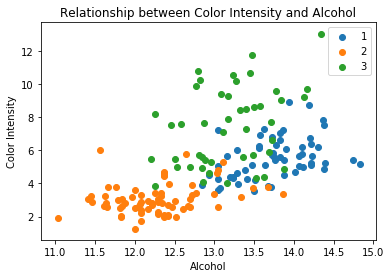

In [2]:
df = pd.read_csv('data/strongdrink.txt')
df.dropna(inplace = True)

for cultivar, group in df.groupby(['cultivar']):
    plt.scatter(group['alco'], group['color_int'],label = cultivar)

plt.legend()
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Relationship between Color Intensity and Alcohol')
plt.show()

### Problem 1(b)

In [3]:
X = ['alco','malic','tot_phen','color_int']
y = 'cultivar'

In [4]:
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression(), param_distributions = param_dist1,\
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25, scoring = 'neg_mean_squared_error')
random_search1.fit(df[X], df[y])
print('Optimal tuning parameters:', random_search1.best_params_)
print('MSE =', abs(random_search1.best_score_))

Optimal tuning parameters: {'C': 6.94968744374135, 'penalty': 'l2'}
MSE = 0.09015873015873017


### Problem 1(c)

In [6]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
random_search2 = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_dist2,\ 
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25, scoring='neg_mean_squared_error')

random_search2.fit(df[X], df[y])

print('Optimal tuning parameters', random_search2.best_params_)
print('MSE =', abs(random_search2.best_score_))

Optimal tuning parameters {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 19, 'min_samples_split': 4, 'n_estimators': 22}
MSE = 0.10238095238095238


### Problem 1(d)

In [8]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}

random_search3 = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions = param_dist3,\
                                   n_iter = 200, n_jobs = -1, cv = 5, random_state = 25, scoring='neg_mean_squared_error')

random_search3.fit(df[X], df[y])

print('Optimal tuning parameters', random_search3.best_params_)
print('MSE =', abs(random_search3.best_score_))

Optimal tuning parameters {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
MSE = 0.1461904761904762


### Problem 1(e)

In [12]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(MLPClassifier(), param_distributions = param_dist4,\
                                   n_iter = 200, n_jobs = -1, cv = 5, random_state = 25, scoring='neg_mean_squared_error')

random_search4.fit(df[X], df[y])

print('Optimal tuning parameters', random_search4.best_params_)
print('MSE =', abs(random_search4.best_score_))

Optimal tuning parameters {'activation': 'relu', 'alpha': 1.2079463985549488, 'hidden_layer_sizes': 93}
MSE = 0.20920634920634923


C:\Users\60207\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Problem 1(f)

From the above model, the logistic regression is the best predictor of cultivar since it has the lowest MSE. From the above three (Random Forrest, SVM, Neural Network), Random Forrest is the best predictor with the lowest MSE.